### CAPP 30122 Team Project - Food in the Hood

The project has the objective of finding out the intercorrelation between crime activites and the sufficiency of food resources in Chicago. To achieve this goal, our team has scraped the data from the Chicago Data Portal and Chicago Health Atlas. The latter collected food resource information of the 72 of 77 neighborhoods in the Chicago area. This notebook is devoted to presenting Plotly visualizations in order to find out answers to the three questions below:
- Which of the 72 neighrboods has the amplest and scarcest food resources?
- Which neighborhood has the highest crime level? How has crime changed over the recent 5 years?
- What's the relationship between crime rates and food availability?

First, we load necessary packages. 

In [1]:
import pandas as pd
import json
import chart_studio.plotly as py
import plotly.io as pio
import plotly.offline as po
import plotly.graph_objs as pg
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

We add this line to ensure that the interactive visuals can be displayed appropriately in the notebook

In [2]:
po.init_notebook_mode(connected = True)

In [3]:
# comment out this line for interactive graphs
pio.renderers.default = "svg"
#pio.renderers.default = "notebook"


Before we draw our graphs, we need to perform some data wrangling steps. Because crime data and food resources are separately contained in two datasets, we first need to merge them.

In [7]:
poverty_crime = pd.read_csv("poverty_and_crime.csv")
food_data = pd.read_csv("food_data.csv")

In [12]:
crime_food = pd.merge(poverty_crime, food_data.iloc[:,0:7], on=["community_area"])
crime_food

,community_area,community_area_name,assault_homicide,firearm_related,below_poverty_level,crowded_housing,dependency,no_high_school_diploma,per_capita_income,unemployment,adult_fruit_and_vegetable_servings_rate,adult_soda_consumption_rate,low_food_access,poverty_rate,crime_rate,population
0,68,Englewood,45.1,44.9,42.2,4.8,43.4,29.4,11993,21.3,24.3,39.1,22.253462,40.102563,2875.951436,22874.516993
1,24,West Town,8.5,6.6,15.7,2.0,22.9,13.4,39596,6.0,30.4,19.7,0.611314,10.891942,906.098963,84714.808339
2,25,Austin,34.4,28.5,27.0,5.7,39.0,25.0,15920,21.0,17.3,35.9,32.407617,25.383450,1781.124262,93940.666333
3,26,West Garfield Park,40.0,36.0,40.3,8.9,42.5,26.2,10951,25.2,23.1,47.3,0.050123,39.003609,3555.065181,16414.888906
4,35,Douglas,13.6,9.1,26.1,1.6,31.0,16.9,23098,16.7,37.5,19.9,36.581069,34.931287,1395.904344,18763.463356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,23,Humboldt Park,29.0,22.7,32.6,11.2,38.3,36.8,13391,12.3,13.9,33.0,16.426263,26.680896,1514.423805,55049.319577
68,43,South Shore,33.4,30.0,31.5,2.9,37.6,14.9,18366,17.7,26.2,38.2,57.595988,31.095048,2013.656723,43755.223524
69,49,Roseland,40.9,37.7,19.5,3.1,40.9,17.4,17974,17.8,16.9,33.2,66.602901,23.409324,1777.444238,39252.989495
70,27,East Garfield Park,38.4,37.1,39.7,7.5,43.2,26.2,13596,16.4,25.2,30.1,52.335680,44.351199,2750.608096,18950.718601


We will want to set `community_area` as the index and change it to the string type

In [13]:
crime_food.set_index('community_area', drop=False, inplace=True)
crime_food['community_area'] = crime_food['community_area'].astype(str)
crime_food['community_area_name'] = crime_food['community_area_name'].str.upper()

Now we load the dataset `chi2.csv`, which covers the geographic information of these 72 neighborhoods and merge it with the dataset `crime_food`. This is the comprehensive dataset we will use for our analysis. 

(Due to the GeoPandas issue, this part has been deleted)

In [15]:
#chicago_geo = pd.read_csv("chi2.csv") 
#chicago_geo = chicago_geo.rename(columns={'community_area_name_x': 'community_area_name'})
#chicago_geo = chicago_geo[["community_area_name", "shape_area", "shape_len", "geometry"]]
#chicago_geo

In [16]:
crime_food_geo = crime_food
#crime_food_geo = pd.merge(crime_food, chicago_geo, on = ["community_area_name"])
#crime_food_geo.head(10)

In [11]:
# crime_map = px.choropleth_mapbox(crime_food_geo, geojson= json.loads(crime_food_geo['geometry'].to_json()) , locations='community_area', color='assault_homicide',
#                            title = "Violent Crime in Chicago",
#                            color_continuous_scale="OrRd",
#                            hover_name= "community_area_name",
#                            range_color=(0, 12),
#                            mapbox_style="white-bg",
#                            zoom=9, 
#                            center = {'lat': 41.8781, 'lon': -87.6298},
#                            opacity=0.5
#                       #     labels={'unemp':'unemployment rate'}
#                           )


In [ ]:
# fig = px.choropleth_mapbox(crime_food_geo, geojson=json.loads(crime_food_geo['geometry'].to_json()), locations='community_area', color='unemployment',
#       title = 'unemployment rate',
#       hover_name = 'community_area_name',
#       color_continuous_scale="OrRd", 
#       mapbox_style='white-bg',
#       zoom=9, 
#       center= {'lat': 41.8781, 'lon': -87.6298},
#       opacity=0.5,
#       labels={'unemployment':'unemp_rate'}
#       )


# fig.update_geos(fitbounds="locations", visible=False)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

#fig.update_geos(fitbounds="locations", visible=False)
#fig.update_layout(margin={'r':20,'t':40,'l':20,'b':10,'pad':5})
#fig.show()
#figwid = pg.FigureWidget(fig)
#display(figwid)

#py.iplot(figwid, filename='jupyter_bar')

In [ ]:
#crime_map.update_layout(margin={'r':20,'t':40,'l':20,'b':10,'pad':5})
#crime_map.show()

**1. Exploratory analysis of Chicago's crime and food resource situations**

To answer our first question, we conducted some exploratory analysis in order to grasp a basic understanding of the crime level and food resource information in Chicago. 

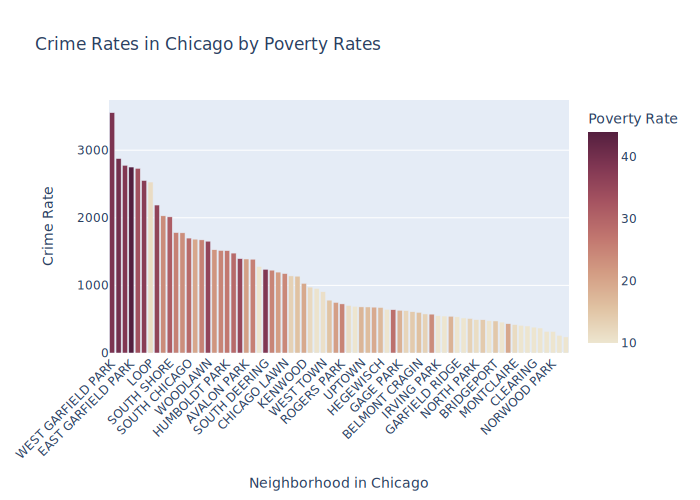

In [17]:
crime_plot = px.bar(crime_food_geo, y = "crime_rate", x = "community_area_name", color = "poverty_rate", 
            title="Crime Rates in Chicago by Poverty Rates", color_continuous_scale=px.colors.sequential.Brwnyl,
            labels= {"crime_rate": "Crime Rate", "community_area_name": "Neighborhood in Chicago", "poverty_rate": "Poverty Rate"}, 
            range_color=[10,44])
crime_plot.update_layout(barmode='group', xaxis_tickangle=-45,  xaxis={'categoryorder':'total descending'})
crime_plot.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
crime_plot.show()

The first graph displays information about the crime rates of the 72 neighborhoods in Chicago, where the darkness or lightness of each bar represents level of poverty rates. From the "quasi-two level" bar charts, we conclude that roughly speaking, crime rates are positively correlated with the poverty rates. 

There are a few outliers for this statement. First is neighboord `Loop`, which has one of the highest crime level but an extremely low poverty level. Second is `South Deering` with a relatively low crime rate but high poverty rate. The specific reasons for why these two communities deviated from the norm are left for future analysis. 

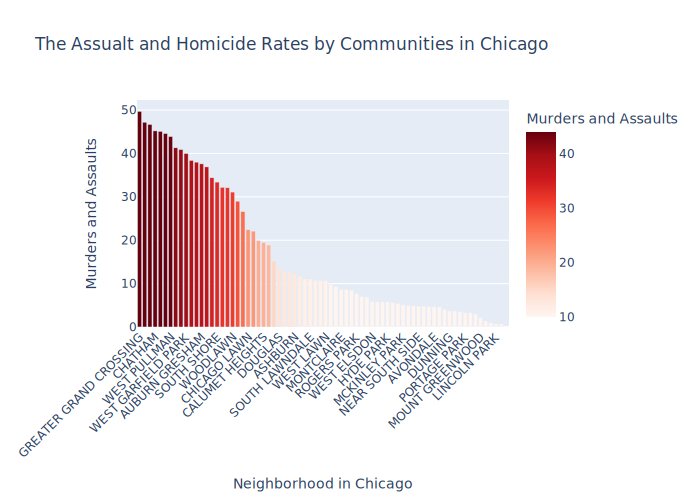

In [18]:
assault_plot = px.bar(crime_food_geo, y = "assault_homicide", x = "community_area_name", color = "assault_homicide", 
            title="The Assualt and Homicide Rates by Communities in Chicago", color_continuous_scale=px.colors.sequential.Reds,
            labels= {"assault_homicide": "Murders and Assaults", "community_area_name": "Neighborhood in Chicago"}, range_color=[10,44])
assault_plot.update_layout(barmode='group', xaxis_tickangle=-45,  xaxis={'categoryorder':'total descending'})
assault_plot.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
assault_plot.show()

Unsurprisingly, some of the neighborhoods have shockingly high muder and assault counts. It was out of our expectation that Austin, which has the highest total crime counts between 2015 and 2019, did not rank the first on this graph. 

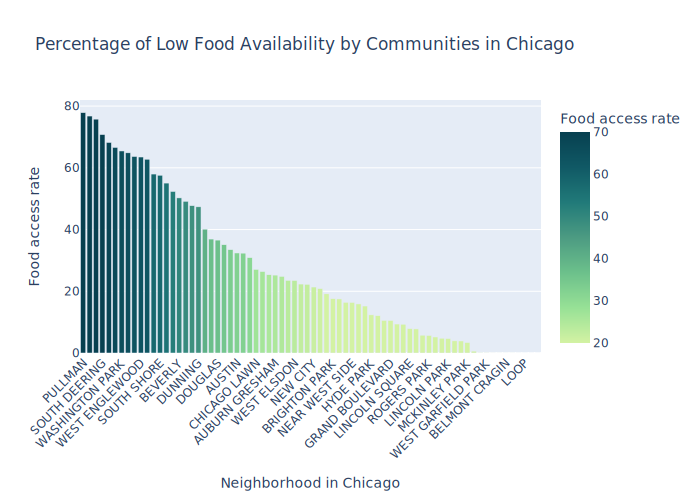

In [19]:
food_access = px.bar(crime_food_geo, y = "low_food_access", x = "community_area_name", color = "low_food_access", 
            title="Percentage of Low Food Availability by Communities in Chicago", color_continuous_scale=px.colors.sequential.Emrld,
            labels= {"low_food_access": "Food access rate", "community_area_name": "Neighborhood in Chicago"}, range_color=[20,70])
food_access.update_layout(barmode='group', xaxis_tickangle=-45,  xaxis={'categoryorder':'total descending'})
food_access.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
food_access.show()

It seems like the food resource chart doesn't exactly match the crime level graph, although the similarity is high. In a general sense, a community with low food resource (or high low food access rate) is more likely to experience crime problems.  

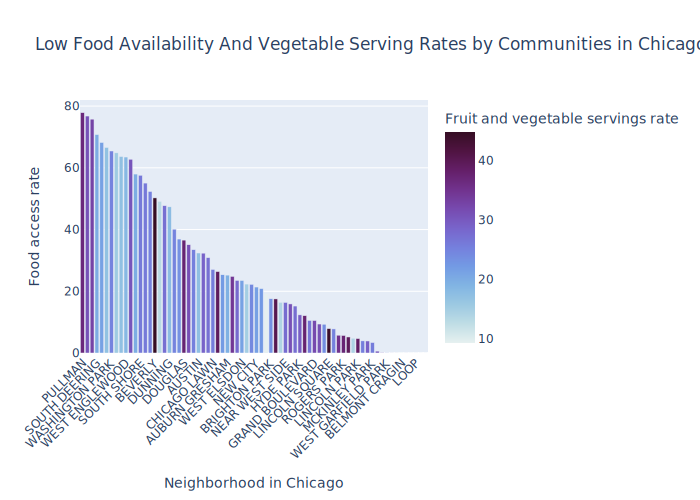

In [20]:
soda ="adult_fruit_and_vegetable_servings_rate"

soda_food = px.bar(crime_food_geo, y = "low_food_access", x = "community_area_name", color = soda, 
            title="Low Food Availability And Vegetable Serving Rates by Communities in Chicago", 
            color_continuous_scale=px.colors.sequential.dense,
            labels= {"low_food_access": "Food access rate", "community_area_name": "Neighborhood in Chicago", 
            soda: "Fruit and vegetable servings rate"})
soda_food.update_layout(barmode='group', xaxis_tickangle=-45,  xaxis={'categoryorder':'total descending'})
soda_food.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
soda_food.show()

Well, seems like food access rate does not really match the proportion of people having food and vegetable in daily dining. This is very surprising. 

**2. How has the crime level changed for top eight Chicago-based hyper-crime neighborhoods betweem 2015 and 2019?**

We start with loading the total crimes and rolling total crimes datasets. The former contained longitudinal information about the total crime numbers in 72 Chicago neighborhoods in 2014-2019, while the latter is the cumulative version for the former that it added all the number together and shows the period sum of crime numbers. We use the second dataset to find out the top-8 neighborhoods in terms of the frequency of crime activities. These 8 neighborhoods will be used for our visualization. 

In [21]:
total_crime = pd.read_csv("crime/total_crime.csv")
rolling_crimes = pd.read_csv("crime/rolling_total_crime.csv")
total_crime


,community_area,year,0
0,1,2019,4053
1,10,2019,1163
2,11,2019,970
3,12,2019,463
4,13,2019,796
...,...,...,...
457,75,2014,2155
458,76,2014,2017
459,77,2014,2332
460,8,2014,9001


In [22]:
rolling_crimes[rolling_crimes['year'] == '2015-2019'].sort_values("crime_num", ascending=False).head(10)

,community_area,year,crime_num
24,25,2015-2019,16732.0
7,8,2015-2019,10821.0
31,32,2015-2019,9093.0
28,29,2015-2019,8908.4
42,43,2015-2019,8810.8
27,28,2015-2019,8779.2
22,23,2015-2019,8336.8
70,71,2015-2019,7696.6
23,24,2015-2019,7676.0
66,67,2015-2019,7256.4


Ok. we have found out the 8 neighborhoods we want. Now we need to make both `community_area` and `year` categorical so that we won't get weird graphs (and it makes no sense to treat them as numerical as we can't perform basic algebra operations on these numbers, whereas, these numbers suggest divergent levels). We also renamed the column `0` so that the new column name can reflect on what the column truly represents. Lastly, we merged this data with the `poverty_crime` data to add a new column that tells us the name of each community area. Becasue dataset `total_crime` is in the long format, while `poverty_crime` is in the wide format, we did not include other columns in our merging. 

In [23]:
total_crime["community_area"] = total_crime["community_area"].astype('category')
total_crime["year"] = total_crime["year"].astype('category')
total_crime = pd.merge(total_crime, poverty_crime[["community_area_name", "community_area"]], on=["community_area"])
total_crime = total_crime.rename(columns={'0': 'Crime Number'})

In [24]:
total_crime_top = total_crime[total_crime["community_area"].isin([25,8,32,29,43,28,23,71])]

Now we make our line graph:

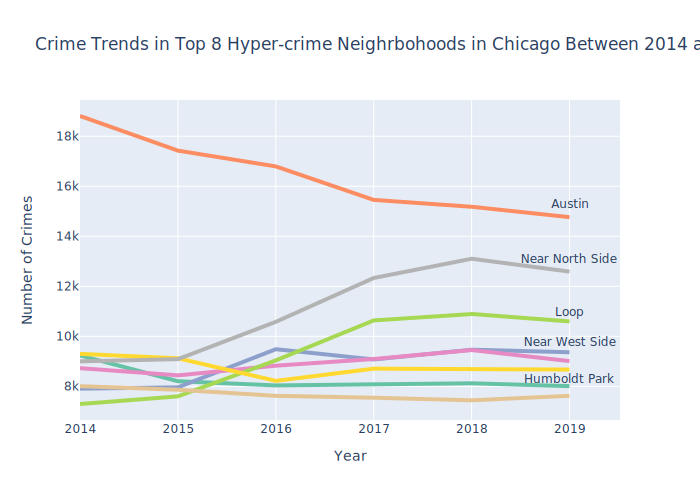

In [25]:
crime_by_year = px.line(total_crime_top, y = "Crime Number", x = "year", color = "community_area_name", 
            title="Crime Trends in Top 8 Hyper-crime Neighrbohoods in Chicago Between 2014 and 2018", 
            labels= {"community_area_name": "Neighborhood", "year": "Year", "Crime Number": "Number of Crimes"},
            color_discrete_sequence = px.colors.qualitative.Set2)
crime_by_year.update_traces(patch={"line":{"width":4}})
crime_by_year.update_layout(annotations = [{"x":"2019", "y":15300,
            "text":"Austin",
            "showarrow":False}, 
            {"x":"2019", "y":13100,
            "text":"Near North Side",
            "showarrow":False}, 
            {"x":"2019", "y":11000,
            "text":"Loop",
            "showarrow":False},
            {"x":"2019", "y":9800,
            "text":"Near West Side",
            "showarrow":False}, 
            {"x":"2019", "y":8300,
            "text":"Humboldt Park",
            "showarrow":False}],
            showlegend = False)
crime_by_year.show()

As we are able to find out, neighborhood **Austin** had a large crime drop between 2014 and 2017, and the decreasing trend continued between 2017 and 2019 but in a lower magnitude. The neighborhood, however, remained to have the most criminal activities in total and far above the second seat. 

There were a crime increase between 2015 and 2018 for neighborhoods **Near North Sides** and **Loop**, and their crime levels mildly shrank betweem 2018 and 2019.  

Lastly, we failed to see big changes in the number of crimes in the other 5 neighborhoods. 

It might be concering for researchers and policymakers to dig into what happened in 2015 and 2018 in Chicago, as these two years are the two cut-off points as indicated by the graph. For example, it is possible that a change in city-level crime prevention policy caused the changes.  

**3. What's the relationship between crime and food?**

To answer our last question, I used scatterplots to visualize the relationship and use outputs of regression analysis to reinforce my findings from the graphs. This part contains two steps:

-       1. Visualizations
Becasue each column adopts different units, we shall standardize our data to ensure the unbiasedness of our analysis. To make this happen, I wrote a function standardization() that takes in a column of a dataframe and standardize the column. The standardized dataset is named `crime_food_geo_stand`. 

In [26]:
def standardization(column):
    return (column - column.mean())/column.std()

In [27]:
crime_food_geo

,community_area,community_area_name,assault_homicide,firearm_related,below_poverty_level,crowded_housing,dependency,no_high_school_diploma,per_capita_income,unemployment,adult_fruit_and_vegetable_servings_rate,adult_soda_consumption_rate,low_food_access,poverty_rate,crime_rate,population
community_area,,,,,,,,,,,,,,,,
68,68,ENGLEWOOD,45.1,44.9,42.2,4.8,43.4,29.4,11993,21.3,24.3,39.1,22.253462,40.102563,2875.951436,22874.516993
24,24,WEST TOWN,8.5,6.6,15.7,2.0,22.9,13.4,39596,6.0,30.4,19.7,0.611314,10.891942,906.098963,84714.808339
25,25,AUSTIN,34.4,28.5,27.0,5.7,39.0,25.0,15920,21.0,17.3,35.9,32.407617,25.383450,1781.124262,93940.666333
26,26,WEST GARFIELD PARK,40.0,36.0,40.3,8.9,42.5,26.2,10951,25.2,23.1,47.3,0.050123,39.003609,3555.065181,16414.888906
35,35,DOUGLAS,13.6,9.1,26.1,1.6,31.0,16.9,23098,16.7,37.5,19.9,36.581069,34.931287,1395.904344,18763.463356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,23,HUMBOLDT PARK,29.0,22.7,32.6,11.2,38.3,36.8,13391,12.3,13.9,33.0,16.426263,26.680896,1514.423805,55049.319577
43,43,SOUTH SHORE,33.4,30.0,31.5,2.9,37.6,14.9,18366,17.7,26.2,38.2,57.595988,31.095048,2013.656723,43755.223524
49,49,ROSELAND,40.9,37.7,19.5,3.1,40.9,17.4,17974,17.8,16.9,33.2,66.602901,23.409324,1777.444238,39252.989495


In [29]:
crime_food_geo_stand = crime_food_geo.copy().iloc[:,2:16]
for i in range(14):
    crime_food_geo_stand.iloc[:,i] = standardization(crime_food_geo_stand.iloc[:,i])
crime_food_geo_stand = crime_food_geo[["community_area_name", "community_area"]].join(crime_food_geo_stand)
crime_food_geo_stand

,community_area_name,community_area,assault_homicide,firearm_related,below_poverty_level,crowded_housing,dependency,no_high_school_diploma,per_capita_income,unemployment,adult_fruit_and_vegetable_servings_rate,adult_soda_consumption_rate,low_food_access,poverty_rate,crime_rate,population
community_area,,,,,,,,,,,,,,,,
68,ENGLEWOOD,68,1.844623,2.188474,2.376892,-0.011832,1.095746,0.676624,-0.926348,1.398217,-0.356898,0.957462,-0.202802,2.069215,2.352286,-0.607397
24,WEST TOWN,24,-0.553241,-0.702652,-0.348371,-0.757223,-1.726312,-0.612397,0.904932,-1.067013,0.430392,-0.752309,-1.109851,-0.784070,-0.256053,2.238182
25,AUSTIN,25,1.143608,0.950498,0.813722,0.227758,0.490036,0.322143,-0.665817,1.349879,-1.260345,0.675438,0.222771,0.631456,0.902593,2.662710
26,WEST GARFIELD PARK,26,1.510495,1.516646,2.181496,1.079634,0.971851,0.418820,-0.995478,2.026609,-0.511774,1.680150,-1.133371,1.961870,3.251520,-0.904637
35,DOUGLAS,35,-0.219113,-0.513936,0.721166,-0.863707,-0.611255,-0.330423,-0.189603,0.657037,1.346747,-0.734683,0.397686,1.564086,0.392512,-0.796567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,HUMBOLDT PARK,23,0.789825,0.512678,1.389627,1.691919,0.393673,1.272796,-0.833600,-0.051918,-1.699163,0.419854,-0.447027,0.758190,0.549447,0.873126
43,SOUTH SHORE,43,1.078093,1.063728,1.276503,-0.517633,0.297310,-0.491551,-0.503541,0.818163,-0.111676,0.878143,1.278447,1.189364,1.210496,0.353428
49,ROSELAND,49,1.569459,1.644972,0.042422,-0.464390,0.751593,-0.290141,-0.529548,0.834275,-1.311971,0.437480,1.655938,0.438624,0.897720,0.146258


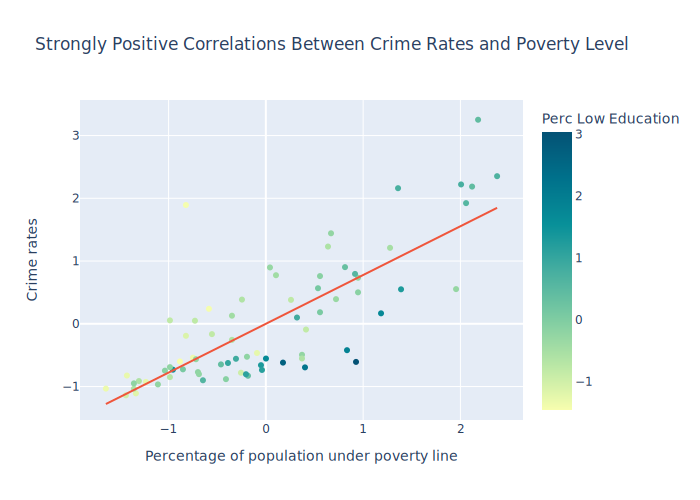

In [30]:
crime_poverty_scatter = px.scatter(crime_food_geo_stand, y = "crime_rate", x = "below_poverty_level", title = "Strongly Positive Correlations Between Crime Rates and Poverty Level",
            hover_data=['community_area_name'], color = "no_high_school_diploma",
            color_continuous_scale=px.colors.sequential.Bluyl,
            labels= {"crime_rate": "Crime rates", "community_area_name": "Community in Chicago", "below_poverty_level": "Percentage of population under poverty line", 
            "no_high_school_diploma": "Perc Low Education"}, trendline="ols")
#crime_education_scatter.update_layout(legend_title_text="Perc Low Education")
crime_poverty_scatter.show()

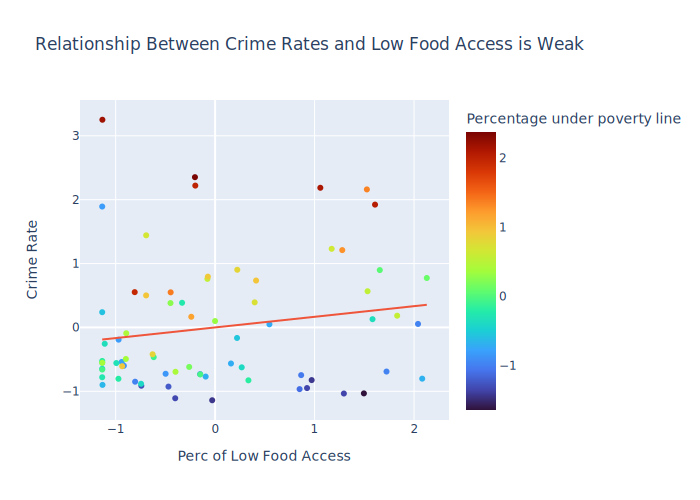

In [32]:
crime_food_scatter = px.scatter(crime_food_geo_stand, x = "low_food_access", y = "crime_rate", 
            title = "Relationship Between Crime Rates and Low Food Access is Weak",
            hover_data=['community_area_name'], color = "below_poverty_level",
            color_continuous_scale=px.colors.sequential.Turbo,
            labels= {"crime_rate": "Crime Rate", "community_area_name": "Community in Chicago", 
            "below_poverty_level": "Percentage under poverty line", 
            "low_food_access": "Perc of Low Food Access"}, trendline="ols")
#crime_education_scatter.update_layout(legend_title_text="Perc Low Education")
crime_food_scatter.show()

Associating both graphs, we noticed that crime rates are strongly related to the poverty rate ($\beta = 0.78$) and lightly correlated with the percentage of having low food access ($\beta = .16$). Both relationships are positive. 

In the first scatter plot, the darkness of the dot represents the percentage of having a high school or below degree, while in the second one, the density of the color represents the percentage under poverty line. As it showed, crime rates may be related to the low educational attainment of the residents, however, such relationship is weak. 


-               OLS Regression
We now reinforce our findings with regression analysis. We will use the following packages:


In [33]:
from sklearn import datasets, linear_model 
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm
from scipy import stats

We first test a serious of socioeconomic variables including violent crime (aggravate assault and murder) rates (`assault_homicide`), percentage of crime cases involving firearms (`firearm_related`), percentage of population living under the poverty line (`below_poverty_level`), percentage of residents without a high school diploma (`no_high_school_diploma`), and unemployment rates (`unemployment`), to test their effects on crime rates. We will add food-related vairables later.

In [34]:
X = crime_food_geo_stand[["assault_homicide", "firearm_related", "below_poverty_level", "no_high_school_diploma", "unemployment"]]
y = crime_food_geo_stand["crime_rate"]

X2 = sm.add_constant(X) 
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     54.66
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           3.78e-22
Time:                        04:42:46   Log-Likelihood:                -42.721
No. Observations:                  72   AIC:                             97.44
Df Residuals:                      66   BIC:                             111.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.73

The output shows that all variables with the exception of `unemployment` are statistically significant ($p$ < .05).  This model explained around 80% of the variance in our outcome (i.e., $R_{adj}^2 = .796$), therefore, the combination of these socioeconomic variables is successful in predicting the crime rates.



Now we look at the relationship between crime rates and health-related variables, including the percentage of population with low food access (`low_food_access`), the percentage of adult population that enjoyed enjough fruits and vegetables in their dining (`adult_fruit_and_vegetable_servings_rate`), and the soda consumption rates for adult populations (`adult_soda_consumption_rate`).

In [35]:
X_food = crime_food_geo_stand[["low_food_access", "adult_fruit_and_vegetable_servings_rate", "adult_soda_consumption_rate"]]

X2_food = sm.add_constant(X_food) 
est_food = sm.OLS(y, X2_food)
est2_food = est_food.fit()
print(est2_food.summary())

                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     5.869
Date:                Mon, 14 Mar 2022   Prob (F-statistic):            0.00126
Time:                        04:42:49   Log-Likelihood:                -93.371
No. Observations:                  72   AIC:                             194.7
Df Residuals:                      68   BIC:                             203.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Only the adult soda consumption rate is statistically significant in predicting the crime level. With one unit increase in the soda consumption, the crime rate will on avergae go up by 0.42 unit. One explannation could be that poor people are more likely to consume more sodas and that poor people are also more likely to commit crimes. Compared to the first one, this model only explains 16.6% of variance in $y$. Future scholars should also prioritize reasons for which the low food access and low fruit and vegetable serving rates are not significant. 

Lastly, we test out the model with soda consumption and all but the unemployment socioeconomic indicators.

In [36]:
X_final = crime_food_geo_stand[["assault_homicide", "firearm_related", "below_poverty_level", "no_high_school_diploma", "adult_soda_consumption_rate"]]
y = crime_food_geo_stand["crime_rate"]

X2_final = sm.add_constant(X_final) 
est_final = sm.OLS(y, X2_final)
est2_final = est_final.fit()
print(est2_final.summary())

                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     54.78
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           3.58e-22
Time:                        04:42:56   Log-Likelihood:                -42.659
No. Observations:                  72   AIC:                             97.32
Df Residuals:                      66   BIC:                             111.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

We see no improvement over model 1 and that this model has a higher AIC (for AIC, the lower the better; for $R^2$ and $R_{adj}^2$, the higher, the better). 

In short, **model 1** will be the best model of these three. 

**4. Exporting data**
 
At the end, I exported three datasets and pushed them to the github for the convenience of future investigation.  

In [82]:
from pathlib import Path  
filepath = Path('project_visualizations/crime_food_geography_info.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True) 

crime_food_geo.to_csv(filepath) 

In [96]:
filepath2 = Path('project_visualizations/total_crime_by_year.csv')  
filepath2.parent.mkdir(parents=True, exist_ok=True) 

total_crime.to_csv(filepath2) 

In [156]:
filepath3 = Path('project_visualizations/standardized_crime_food_geo.csv')  
filepath3.parent.mkdir(parents=True, exist_ok=True) 

crime_food_geo_stand.to_csv(filepath3) 